In [1]:
# https://docs.google.com/forms/d/e/1FAIpQLSfLhw6dS0ASc1UUd2_xHCPoBgNlCqP9dF8q1EJEBR8Lv1KVSQ/viewform
# Suprimir advertencias:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>
5. ANÁLISIS DE LOS DATOS
<h1/>

In [8]:
path = 'Datos_Limpios_Encuesta_Egresados.xlsx'

In [9]:
data_2023 = pd.read_excel(path)

In [10]:
data_2023.head()

,Carrera profesional cursada,Lugar dónde reside,Titulado,Dominio del idioma Inglés,Año de ingreso,Año de egreso,¿Tu egreso fue hace más de 2 años?,"Eficiencia para realizar las actividades laborales, en relación con su formación académica",¿Cómo califica su formación académica con aspecto a su desempeño laboral?,Utilidad de las residencias profesionales o prácticas profesionales para tu desarrollo laboral y profesional,...,"En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Leer]","En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escuchar]","En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escribir]",Antigüedad en el puesto,Nivel jerárquico en el trabajo,Condición de trabajo.1,Relación del trabajo con su área de formación profesional,¿Pertenece a organizaciones sociales?,¿Pertenece a organismos de profesionistas?,¿Pertenece a una asociación de egresados?
0,Ing. Electrónica,"Hermosillo, Son, Mex",0,0.8,2016,2020,1,Eficiente,Bueno,Bueno,...,1.0,1.0,0.5,Menos de 1 año,Supervisor,Base,0.4,0,0,0
1,Ing. Electrónica,"Hermosillo, Sonora, México",1,1.0,2015,2019,1,Muy eficiente,Bueno,Excelente,...,1.0,1.0,1.0,Menos de 1 año,Técnico,Base,1,0,0,0
2,Ing. Electrónica,"Hermosillo,Sonora,Mexico",1,0.6,2017,2020,1,Eficiente,Bueno,Regular,...,0.5,0.5,0.5,1 año,Técnico,Base,0.4,0,0,0
3,Ing. Electrónica,"Hermosillo Sonora, Mexico",1,0.8,2016,2021,1,Eficiente,Bueno,Regular,...,1.0,1.0,1.0,Menos de 1 año,Otro,Contrato,0.8,0,0,0
4,Ing. Biomédica,"Guadalajara, Jalisco, Mexico",1,0.8,2017,2022,0,Muy eficiente,Excelente,Bueno,...,1.0,0.5,0.5,2 años,Supervisor,Base,1,0,0,0


In [11]:
data_2023 = data_2023.iloc[2:, :]

In [12]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 2 to 687
Data columns (total 35 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                             --------------  -----  
 0   Carrera profesional cursada                               

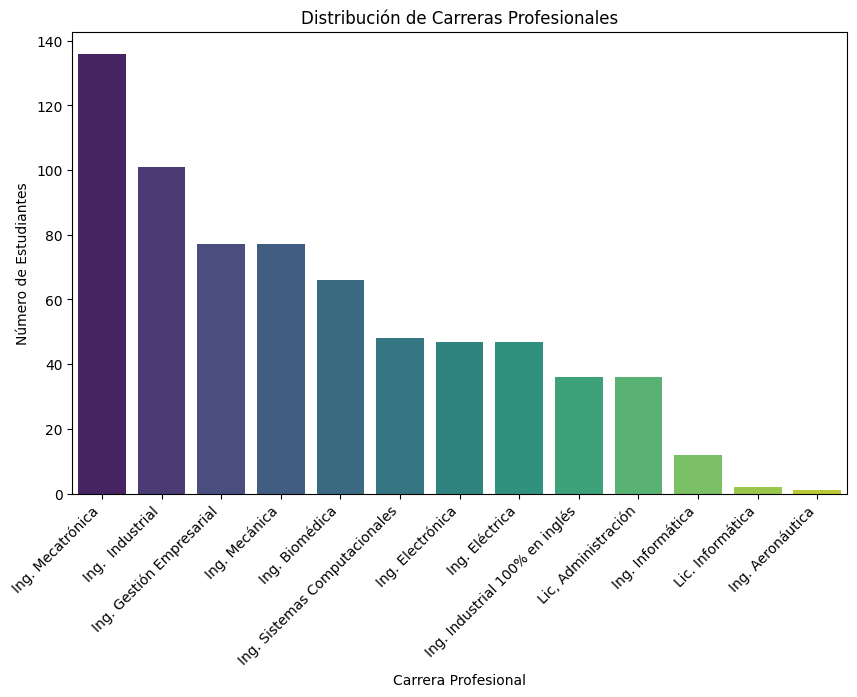

In [13]:
# Contar el número de ocurrencias de cada carrera
carrera_counts = data_2023['Carrera profesional cursada'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=carrera_counts.index, y=carrera_counts.values, palette='viridis')
plt.title('Distribución de Carreras Profesionales')
plt.xlabel('Carrera Profesional')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
carrera_counts

Carrera profesional cursada
Ing. Mecatrónica                  136
Ing.  Industrial                  101
Ing. Gestión Empresarial           77
Ing. Mecánica                      77
Ing. Biomédica                     66
Ing. Sistemas Computacionales      48
Ing. Electrónica                   47
Ing. Eléctrica                     47
Ing. Industrial 100% en inglés     36
Lic, Administración                36
Ing. Informática                   12
Lic. Informática                    2
Ing. Aeronáutica                    1
Name: count, dtype: int64

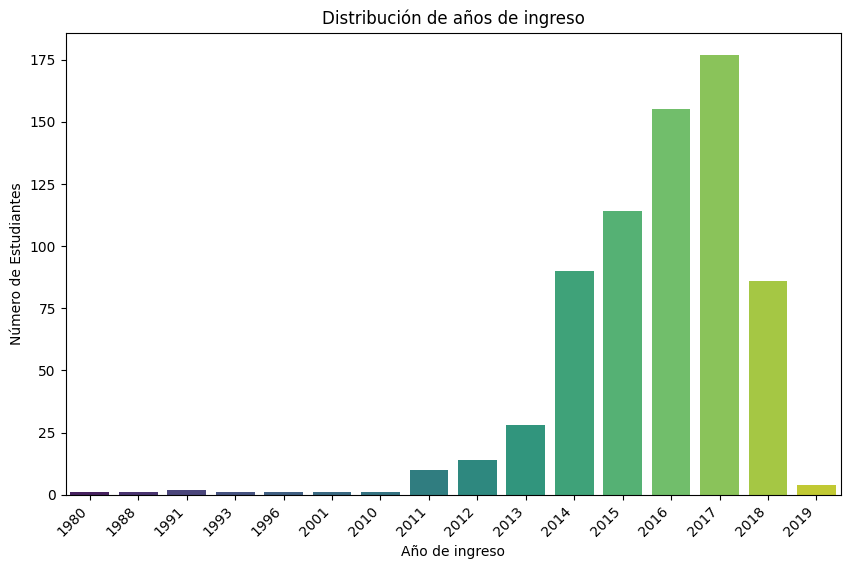

In [15]:
# Contar el número de ocurrencias de cada carrera
Ano_counts = data_2023['Año de ingreso'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=Ano_counts.index, y=Ano_counts.values, palette='viridis')
plt.title('Distribución de años de ingreso')
plt.xlabel('Año de ingreso')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.show()

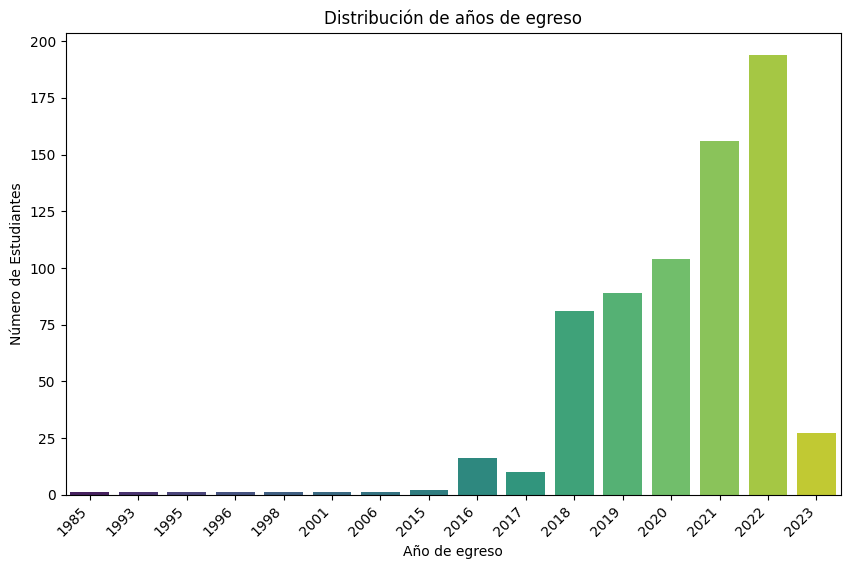

In [16]:
Ano_egreso_counts = data_2023['Año de egreso'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=Ano_egreso_counts.index, y=Ano_egreso_counts.values, palette='viridis')
plt.title('Distribución de años de egreso')
plt.xlabel('Año de egreso')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
data_ingles = data_2023[data_2023['Dominio del idioma Inglés']>0.8].groupby('Carrera profesional cursada').size()
data_ingles

Carrera profesional cursada
Ing.  Industrial                  13
Ing. Aeronáutica                   1
Ing. Biomédica                    18
Ing. Electrónica                   4
Ing. Eléctrica                     3
Ing. Gestión Empresarial          10
Ing. Industrial 100% en inglés    32
Ing. Informática                   3
Ing. Mecatrónica                  42
Ing. Mecánica                     15
Ing. Sistemas Computacionales     10
Lic, Administración                3
Lic. Informática                   1
dtype: int64

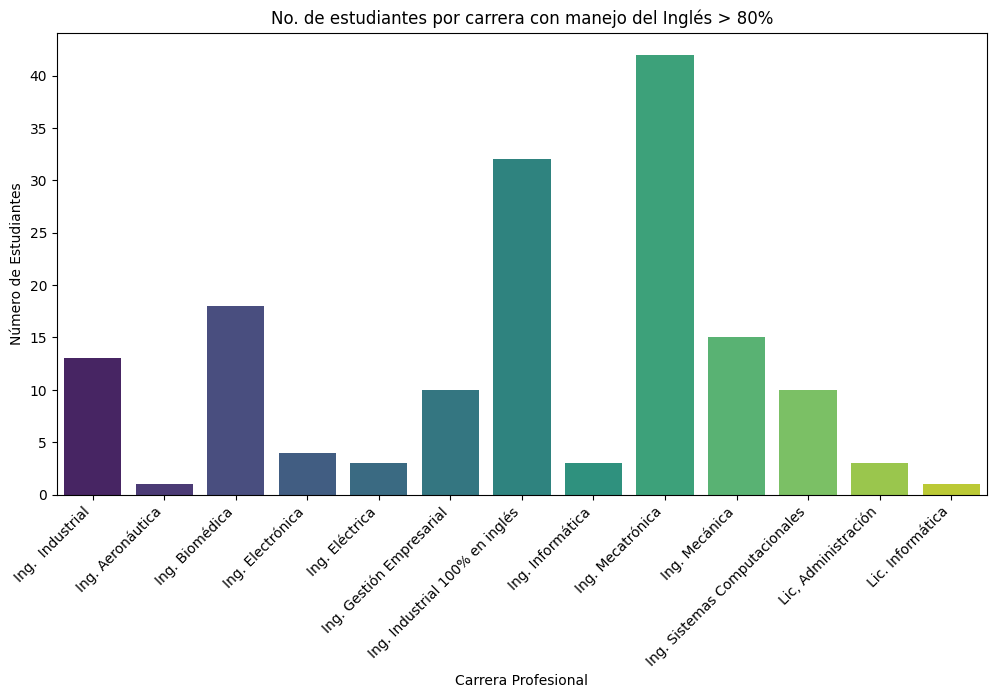

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data_ingles.index, y=data_ingles.values, palette='viridis')

# Personalizar el gráfico
plt.title('No. de estudiantes por carrera con manejo del Inglés > 80%')
plt.xlabel('Carrera Profesional')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [19]:
carreras_interes = ['Ing.  Industrial', 'Ing. Aeronáutica', 'Ing. Biomédica', 'Ing. Electrónica', 'Ing. Eléctrica', 'Ing. Gestión Empresarial', 'Ing. Industrial 100% en inglés',
                    'Ing. Informática', 'Ing. Mecatrónica', 'Ing. Mecánica', 'Ing. Sistemas Computacionales', 'Lic, Administración', 'Lic. Informática']
total_por_carrera = {}

# Bucle para calcular los totales para cada carrera
for carrera in carreras_interes:
    total_por_carrera[carrera] = carrera_counts.get(carrera, 0)



# Lista para almacenar los resultados de porcentajes
porcentajes = []

# Bucle para calcular los porcentajes para cada carrera
for carrera in carreras_interes:
    cantidad_ing = data_ingles.get(carrera, 0)
    total_carrera = total_por_carrera[carrera]

    if total_carrera > 0:
        porcentaje = (cantidad_ing / total_carrera) * 100
    else:
        porcentaje = 0

    porcentajes.append(porcentaje)

# Crear una Serie de Pandas a partir de la lista de porcentajes
porcentaje_ingles = pd.Series(porcentajes, index=carreras_interes, name='Porcentaje Ingles')

# Imprimir la Serie de Pandas
print(porcentaje_ingles)

Ing.  Industrial                   12.871287
Ing. Aeronáutica                  100.000000
Ing. Biomédica                     27.272727
Ing. Electrónica                    8.510638
Ing. Eléctrica                      6.382979
Ing. Gestión Empresarial           12.987013
Ing. Industrial 100% en inglés     88.888889
Ing. Informática                   25.000000
Ing. Mecatrónica                   30.882353
Ing. Mecánica                      19.480519
Ing. Sistemas Computacionales      20.833333
Lic, Administración                 8.333333
Lic. Informática                   50.000000
Name: Porcentaje Ingles, dtype: float64


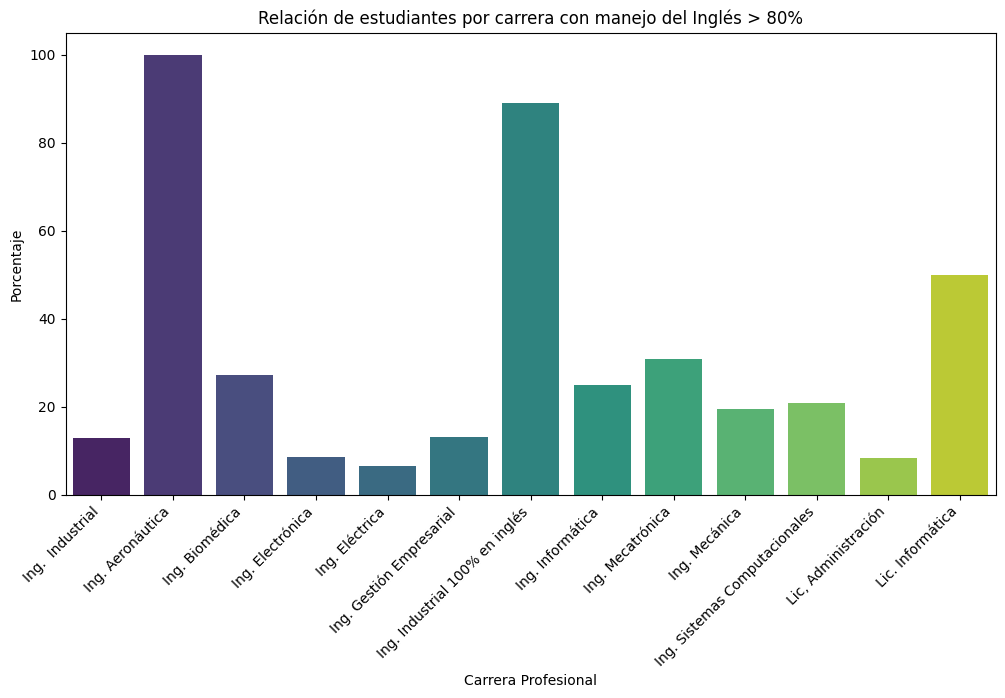

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=porcentaje_ingles.index, y=porcentaje_ingles.values, palette='viridis')

# Personalizar el gráfico
plt.title('Relación de estudiantes por carrera con manejo del Inglés > 80%')
plt.xlabel('Carrera Profesional')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [21]:
data_titulados = data_2023[data_2023['Titulado']=='1'].groupby('Carrera profesional cursada').size()
data_titulados

Series([], dtype: int64)

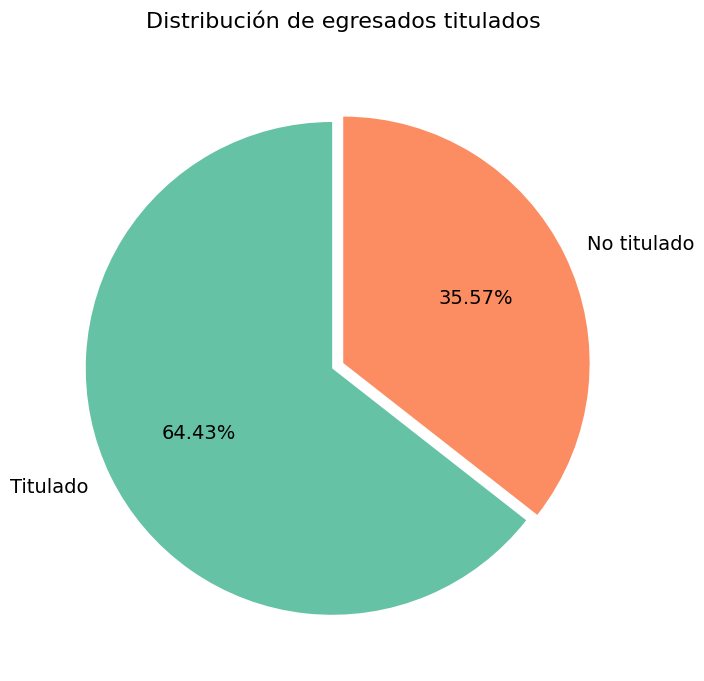

In [22]:
# myexplode = [0.05, 0]
# data_2023['Titulado'].value_counts().plot.pie(explode = myexplode, autopct='%1.1f%%', labels=['Titulado', 'No Titulado'])
# plt.title('Distribución de Titulados')
# plt.ylabel(None)
# plt.show()
myexplode1 = [0.05, 0]
plt.figure(figsize=(8,8))

plt.pie(
    x=data_2023['Titulado'].value_counts(),
    labels=['Titulado', 'No titulado'],
    # show percentage with two decimal points
    autopct='%1.2f%%',
    # increase the size of all text elements
    textprops={'fontsize':14},
    colors=sns.color_palette('Set2'),
    startangle = 90,
    explode = myexplode1
)

# Add Title
plt.title(
    label="Distribución de egresados titulados",
    fontdict={"fontsize":16},
    pad=20
)

plt.show()

In [23]:
carreras_interes = ['Ing.  Industrial', 'Ing. Aeronáutica', 'Ing. Biomédica', 'Ing. Electrónica', 'Ing. Eléctrica', 'Ing. Gestión Empresarial', 'Ing. Industrial 100% en inglés',
                    'Ing. Informática', 'Ing. Mecatrónica', 'Ing. Mecánica', 'Ing. Sistemas Computacionales', 'Lic, Administración', 'Ing. Informática']
total_por_carrera = {}


for carrera in carreras_interes:
    total_por_carrera[carrera] = carrera_counts.get(carrera, 0)

porcentajes = []


for carrera in carreras_interes:
    cantidad_titulados = data_titulados.get(carrera, 0) #cambiar aqui
    total_carrera = total_por_carrera[carrera]

    if total_carrera > 0:
        porcentaje = (cantidad_titulados / total_carrera) * 100 #cambiar aqui
    else:
        porcentaje = 0

    porcentajes.append(porcentaje)

porcentaje_titulados = pd.Series(porcentajes, index=carreras_interes, name='Porcentaje Titulados') #cambiar aqui

print(porcentaje_titulados) #cambiar aqui

Ing.  Industrial                  0.0
Ing. Aeronáutica                  0.0
Ing. Biomédica                    0.0
Ing. Electrónica                  0.0
Ing. Eléctrica                    0.0
Ing. Gestión Empresarial          0.0
Ing. Industrial 100% en inglés    0.0
Ing. Informática                  0.0
Ing. Mecatrónica                  0.0
Ing. Mecánica                     0.0
Ing. Sistemas Computacionales     0.0
Lic, Administración               0.0
Ing. Informática                  0.0
Name: Porcentaje Titulados, dtype: float64


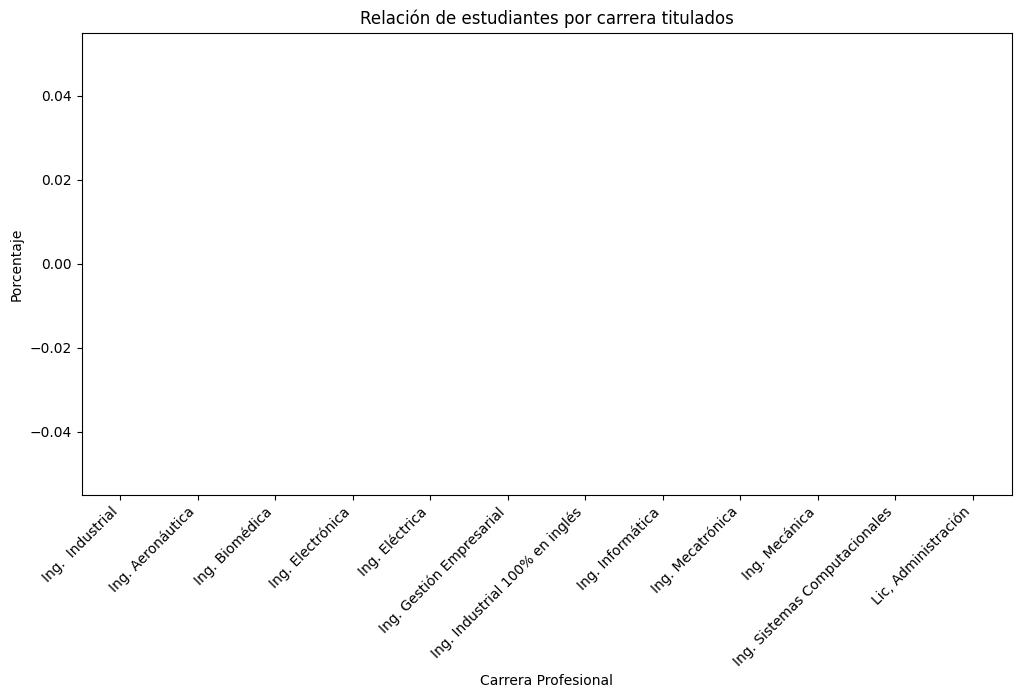

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=porcentaje_titulados.index, y=porcentaje_titulados.values, palette='viridis')

# Personalizar el gráfico
plt.title('Relación de estudiantes por carrera titulados')
plt.xlabel('Carrera Profesional')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [44]:
data_2023['Egresados sin retrasos'] = np.where(data_2023['Año de egreso'] - data_2023['Año de ingreso'] <= 4, 1, 0)
saveas = 'Data_Egresados_PowerBI_2024.xlsx'


In [45]:
data_2023.to_excel(saveas, index = False)

In [41]:
data_2023.head()

,Carrera profesional cursada,Lugar dónde reside,Titulado,Dominio del idioma Inglés,Año de ingreso,Año de egreso,¿Tu egreso fue hace más de 2 años?,"Eficiencia para realizar las actividades laborales, en relación con su formación académica",¿Cómo califica su formación académica con aspecto a su desempeño laboral?,Utilidad de las residencias profesionales o prácticas profesionales para tu desarrollo laboral y profesional,...,"En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escuchar]","En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escribir]",Antigüedad en el puesto,Nivel jerárquico en el trabajo,Condición de trabajo.1,Relación del trabajo con su área de formación profesional,¿Pertenece a organizaciones sociales?,¿Pertenece a organismos de profesionistas?,¿Pertenece a una asociación de egresados?,Egresados sin retrasos
2,Ing. Electrónica,"Hermosillo,Sonora,Mexico",1,0.6,2017,2020,1,Eficiente,Bueno,Regular,...,0.5,0.5,1 año,Técnico,Base,0.4,0,0,0,1
3,Ing. Electrónica,"Hermosillo Sonora, Mexico",1,0.8,2016,2021,1,Eficiente,Bueno,Regular,...,1.0,1.0,Menos de 1 año,Otro,Contrato,0.8,0,0,0,0
4,Ing. Biomédica,"Guadalajara, Jalisco, Mexico",1,0.8,2017,2022,0,Muy eficiente,Excelente,Bueno,...,0.5,0.5,2 años,Supervisor,Base,1,0,0,0,0
5,Ing. Biomédica,Hermosillo,1,0.6,2017,2022,0,Eficiente,Bueno,Excelente,...,0.5,0.5,2 años,Supervisor,Base,1,0,0,0,0
6,Ing. Biomédica,"Hermosillo, Sonora, México",1,1.0,2017,2022,0,Eficiente,Regular,Excelente,...,0.5,0.5,2 años,Supervisor,Base,1,0,0,0,0


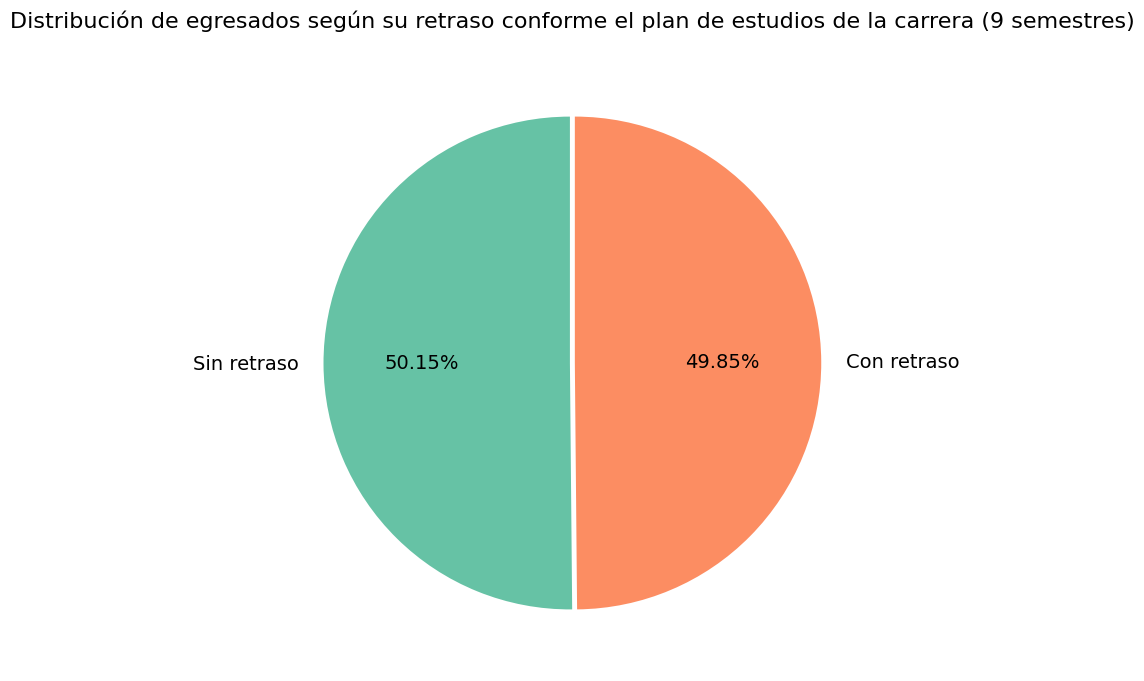

In [26]:
# data_2023['Egresados sin retrasos'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Sin retraso', 'Con retraso'])
# plt.title('Distribución de egresados según su retraso conforme el plan de estudios de la carrera (9 semestres)')
# plt.ylabel(None)
# plt.show()

# Increase the size of the plot
myexplode2 = [0.01, 0.01]
plt.figure(figsize=(8,8))

plt.pie(
    x=data_2023['Egresados sin retrasos'].value_counts(),
    labels=['Sin retraso', 'Con retraso'],
    # show percentage with two decimal points
    autopct='%1.2f%%',
    # increase the size of all text elements
    textprops={'fontsize':14},
    colors=sns.color_palette('Set2'),
    startangle = 90,
    explode = myexplode2
)

# Add Title
plt.title(
    label="Distribución de egresados según su retraso conforme el plan de estudios de la carrera (9 semestres)",
    fontdict={"fontsize":16},
    pad=20
)

plt.show()

In [27]:
data_2023['¿Cómo califica su formación académica con aspecto a su desempeño laboral?'].unique()

array(['Bueno', 'Excelente', 'Regular', 'Malo', 'Pésimo'], dtype=object)

In [28]:
data_2023['¿Cómo califica su formación académica con aspecto a su desempeño laboral?'].value_counts()

¿Cómo califica su formación académica con aspecto a su desempeño laboral?
Bueno        358
Excelente    188
Regular      119
Malo          18
Pésimo         3
Name: count, dtype: int64

ValueError: 'label' must be of length 'x'

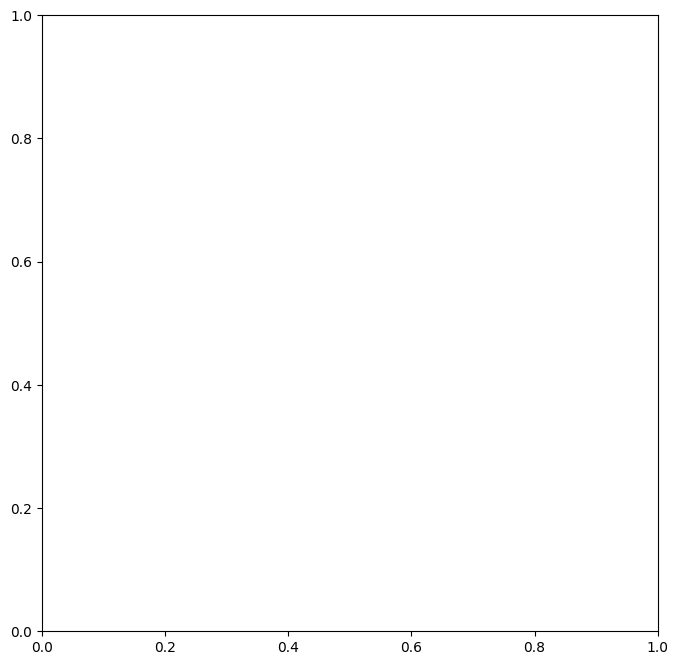

In [30]:
# Increase the size of the plot
myexplode3 = [0.01, 0.01, 0.01, 0.01]
plt.figure(figsize=(8,8))

plt.pie(
    x=data_2023['¿Cómo califica su formación académica con aspecto a su desempeño laboral?'].value_counts(),
    labels=['Bueno', 'Excelente', 'Regular', 'Malo'],
    # show percentage with two decimal points
    autopct='%1.2f%%',
    # increase the size of all text elements
    textprops={'fontsize':14},
    colors=sns.color_palette('Set2'),
    startangle = 0,
    explode = myexplode3
)

plt.title(
    label="Conformidad formación académica vs. desempeño laboral",
    fontdict={"fontsize":16},
    pad=20
)

plt.show()

In [31]:
data_2023['Idioma que utiliza en su trabajo'].value_counts()

Idioma que utiliza en su trabajo
Español       543
Inglés        122
No trabaja     18
Alemán          2
Otro            1
Name: count, dtype: int64

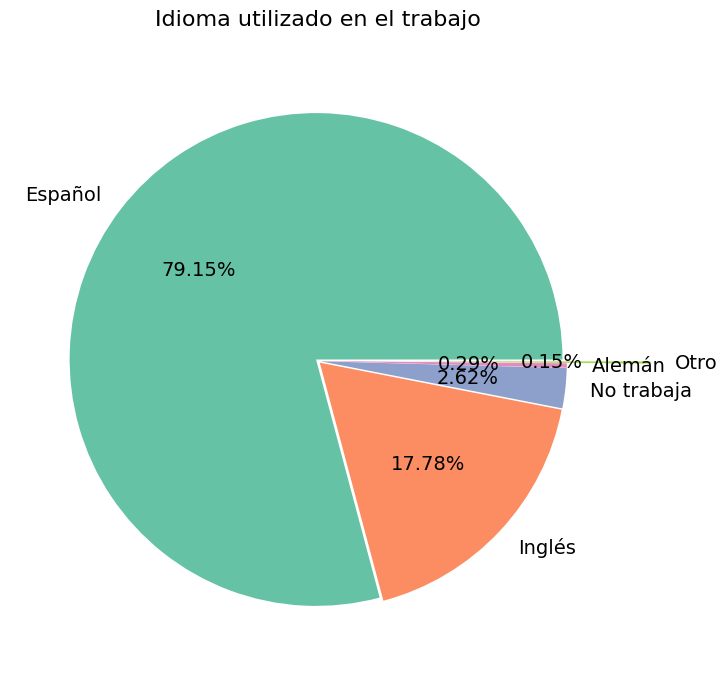

In [32]:
# data_2023['Idioma que utiliza en su trabajo'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Español', 'Inglés', 'No trabaja', 'Alemán', 'Otro'], labeldistance=1.15)
# plt.title('Idioma utilizado en el trabajo')
# plt.ylabel(None)
# plt.show()

# Increase the size of the plot
myexplode4 = [0.01, 0.01, 0.01, 0.01, 0.35]
plt.figure(figsize=(8,8))

plt.pie(
    x=data_2023['Idioma que utiliza en su trabajo'].value_counts(),
    labels=['Español', 'Inglés', 'No trabaja', 'Alemán', 'Otro'],
    # show percentage with two decimal points
    autopct='%1.2f%%',
    # increase the size of all text elements
    textprops={'fontsize':14},
    colors=sns.color_palette('Set2'),
    startangle = 0,
    explode = myexplode4
)

plt.title(
    label="Idioma utilizado en el trabajo",
    fontdict={"fontsize":16},
    pad=20
)

plt.show()

In [33]:
#data_2023['En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Hablar]']

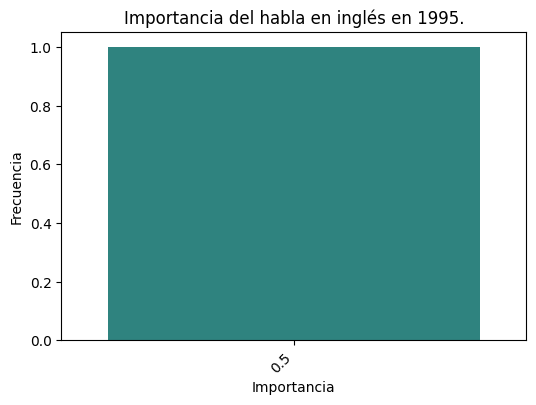

In [34]:
ingles_1995 = data_2023.loc[data_2023['Año de egreso'] == 1995, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Hablar]']
ingles_1995_counts = ingles_1995.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_1995_counts.index, y=ingles_1995_counts.values, palette='viridis')
plt.title('Importancia del habla en inglés en 1995.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

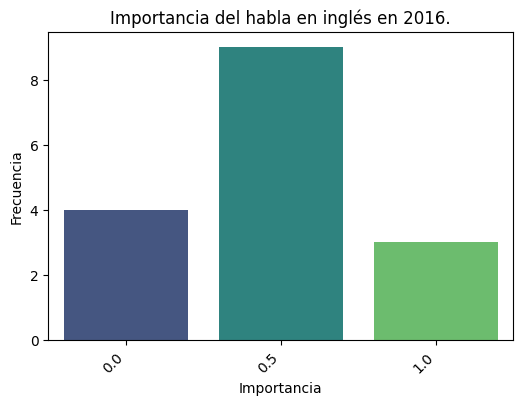

In [35]:
#2016 y 2022
ingles_2016 = data_2023.loc[data_2023['Año de egreso'] == 2016, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Hablar]']
ingles_2016_counts = ingles_2016.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2016_counts.index, y=ingles_2016_counts.values, palette='viridis')
plt.title('Importancia del habla en inglés en 2016.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
ingles_2019 = data_2023.loc[data_2023['Año de egreso'] == 2019, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Hablar]']


In [37]:
ingles_2019_counts = ingles_2019.value_counts()

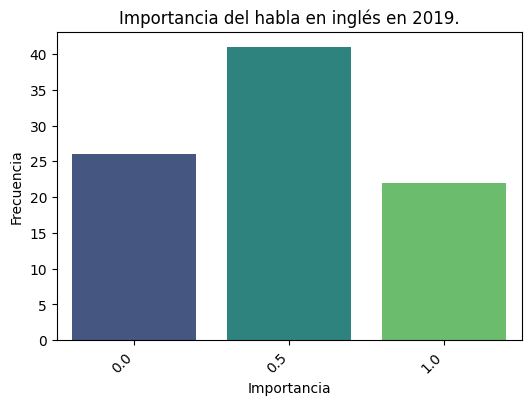

In [38]:
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2019_counts.index, y=ingles_2019_counts.values, palette='viridis')
plt.title('Importancia del habla en inglés en 2019.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

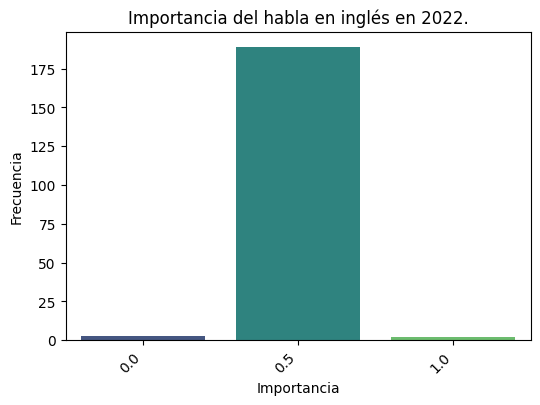

In [39]:
ingles_2022 = data_2023.loc[data_2023['Año de egreso'] == 2022, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Hablar]']
ingles_2022_counts = ingles_2022.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2022_counts.index, y=ingles_2022_counts.values, palette='viridis')
plt.title('Importancia del habla en inglés en 2022.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 26  En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Leer]                                                                                                                                                                                                       482 non-null    object
# 27  En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escuchar]                                                                                                                                                                                                   482 non-null    object
# 28  En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escribir]

In [ ]:
ingles_1995 = data_2023.loc[data_2023['Año de egreso'] == 1995, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Leer]']
ingles_1995_counts = ingles_1995.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_1995_counts.index, y=ingles_1995_counts.values, palette='viridis')
plt.title('Importancia de la lectura en inglés en 1995.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2016 = data_2023.loc[data_2023['Año de egreso'] == 2016, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Leer]']
ingles_2016_counts = ingles_2016.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2016_counts.index, y=ingles_2016_counts.values, palette='viridis')
plt.title('Importancia de la lectura en inglés en 2016.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2019 = data_2023.loc[data_2023['Año de egreso'] == 2019, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Leer]']
ingles_2019_counts = ingles_2019.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2019_counts.index, y=ingles_2019_counts.values, palette='viridis')
plt.title('Importancia de la lectura en inglés en 2019.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2022 = data_2023.loc[data_2023['Año de egreso'] == 2022, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Leer]']
ingles_2022_counts = ingles_2022.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2022_counts.index, y=ingles_2022_counts.values, palette='viridis')
plt.title('Importancia de la lectura en inglés en 2022.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_1995 = data_2023.loc[data_2023['Año de egreso'] == 1995, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escuchar]']
ingles_1995_counts = ingles_1995.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_1995_counts.index, y=ingles_1995_counts.values, palette='viridis')
plt.title('Importancia de la escucha en inglés en 1995.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2016 = data_2023.loc[data_2023['Año de egreso'] == 2016, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escuchar]']
ingles_2016_counts = ingles_2016.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2016_counts.index, y=ingles_2016_counts.values, palette='viridis')
plt.title('Importancia de la escucha en inglés en 2016.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2019 = data_2023.loc[data_2023['Año de egreso'] == 2019, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escuchar]']
ingles_1995_counts = ingles_2019.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2019_counts.index, y=ingles_2019_counts.values, palette='viridis')
plt.title('Importancia de la escucha en inglés en 2019.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2022 = data_2023.loc[data_2023['Año de egreso'] == 2022, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escuchar]']
ingles_2022_counts = ingles_2022.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2022_counts.index, y=ingles_2022_counts.values, palette='viridis')
plt.title('Importancia de la escucha en inglés en 2022.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_1995 = data_2023.loc[data_2023['Año de egreso'] == 1995, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escribir]']
ingles_1995_counts = ingles_1995.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_1995_counts.index, y=ingles_1995_counts.values, palette='viridis')
plt.title('Importancia de la escritura en inglés en 1995.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2016 = data_2023.loc[data_2023['Año de egreso'] == 2016, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escribir]']
ingles_2016_counts = ingles_2016.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2016_counts.index, y=ingles_2016_counts.values, palette='viridis')
plt.title('Importancia de la escritura en inglés en 2016.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2019 = data_2023.loc[data_2023['Año de egreso'] == 2019, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escribir]']
ingles_2019_counts = ingles_2019.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2019_counts.index, y=ingles_2019_counts.values, palette='viridis')
plt.title('Importancia de la escritura en inglés en 2019.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ingles_2022 = data_2023.loc[data_2023['Año de egreso'] == 2022, 'En qué proporción utiliza las siguientes habilidades del idioma extranjero, en el desempeño de sus actividades laborales. (EJEMPLO: Hablar 50%, Leer 50%, Escuchar 50%, Escribir 50%) [Escribir]']
ingles_2022_counts = ingles_2022.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=ingles_2022_counts.index, y=ingles_2022_counts.values, palette='viridis')
plt.title('Importancia de la escritura en inglés en 2022.')
plt.xlabel('Importancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
myexplode4 = [0.01, 0.01, 0.01, 0.01, 0.35]
plt.figure(figsize=(8,8))

plt.pie(
    x=data_2023['Idioma que utiliza en su trabajo'].value_counts(),
    labels=['Español', 'Inglés', 'No trabaja', 'Alemán', 'Otro'],
    # show percentage with two decimal points
    autopct='%1.2f%%',
    # increase the size of all text elements
    textprops={'fontsize':14},
    colors=sns.color_palette('Set2'),
    startangle = 0,
    explode = myexplode4
)

plt.title(
    label="Idioma utilizado en el trabajo",
    fontdict={"fontsize":16},
    pad=20
)

plt.show()